In [1]:
import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [2]:
BASE_DIR = 'imagesNewTest/'
names = [
"Buda_Castle",
"Budapest_Museum_of_Applied_Arts",
"Chain_Bridge_(Budapest)",
"Esztergom_Cathedral",
"Fisherman's_Bastion",
"Gellért_Baths",
"Great_Synagogue_in_Dohány_Street",
"Heroes'_Square_(Budapest)",
"Hungarian_Parliament_Building",
"Hungarian_State_Opera_House",
"Matthias_Church_(Budapest)",
"New_York_Palace_(Budapest)",
"St._Stephen's_Basilica_(Budapest)",
"Szechenyi_Thermal_Bath",
"Szeged_Cathedral",
"Vajdahunyad_Castle_(Budapest)"
]

tf.random.set_seed(1)

In [3]:
batch_size = 10
img_height = 256
img_width = 256

In [4]:
train_ds = tf.keras.utils.image_dataset_from_directory(
    'imagesNewTest/',
    subset="training",
    validation_split=0.2,
    image_size=(img_height, img_width),
    batch_size=batch_size,
    seed=123,
)

Found 1673 files belonging to 16 classes.
Using 1339 files for training.


In [5]:
val_ds = tf.keras.utils.image_dataset_from_directory(
    'imagesNewTest/',
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size
)

Found 1673 files belonging to 16 classes.
Using 334 files for validation.


In [6]:
class_names = names
print(class_names)

['Buda_Castle', 'Budapest_Museum_of_Applied_Arts', 'Chain_Bridge_(Budapest)', 'Esztergom_Cathedral', "Fisherman's_Bastion", 'Gellért_Baths', 'Great_Synagogue_in_Dohány_Street', "Heroes'_Square_(Budapest)", 'Hungarian_Parliament_Building', 'Hungarian_State_Opera_House', 'Matthias_Church_(Budapest)', 'New_York_Palace_(Budapest)', "St._Stephen's_Basilica_(Budapest)", 'Szechenyi_Thermal_Bath', 'Szeged_Cathedral', 'Vajdahunyad_Castle_(Budapest)']


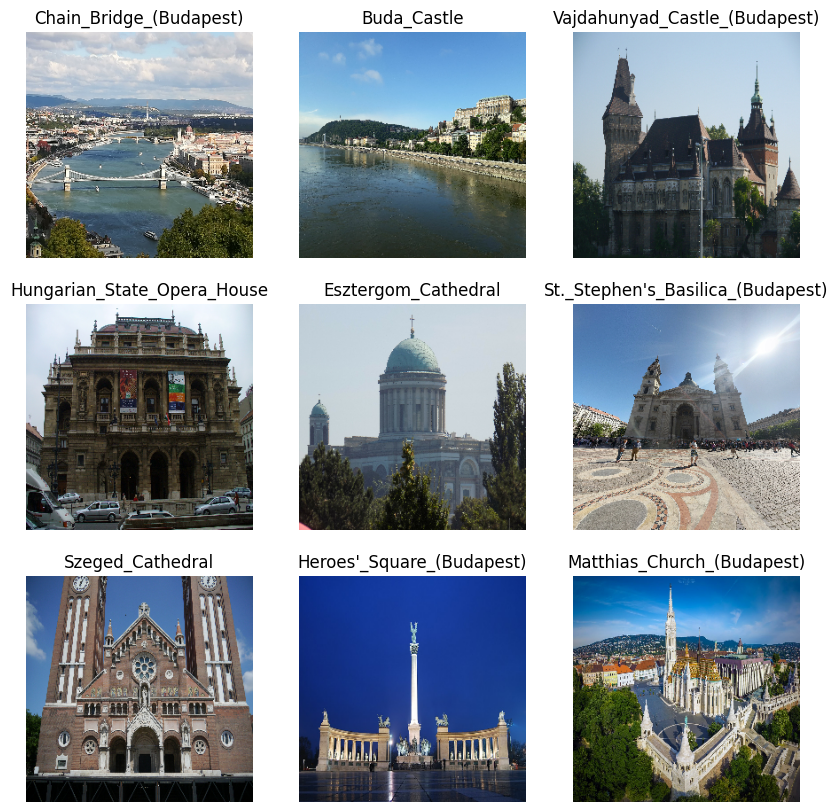

In [7]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

In [8]:
for image_batch, labels_batch in train_ds:
    print(image_batch.shape)
    print(labels_batch.shape)
    break

(10, 256, 256, 3)
(10,)


In [9]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(100).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [10]:
normalization_layer = layers.Rescaling(1./255)

In [11]:
#normalize dataser using with norm. layer
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
# sparete as image and label
image_batch, labels_batch = next(iter(normalized_ds))
# check the first image max and min value
first_image = image_batch[0]
# Notice the pixel values are now in `[0,1]`.
print("minumum value:",np.min(first_image), "maximum values: ",np.max(first_image))

minumum value: 0.0 maximum values:  1.0


In [12]:
num_classes = len(class_names)

model = Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [13]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 256, 256, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 256, 256, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 128, 128, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 64, 64, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 64, 64, 64)        1

In [15]:
epochs=10
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/10
134/134 [==============================] - 72s 199ms/step - loss: 2.8332 - accuracy: 0.0777 - val_loss: 2.7631 - val_accuracy: 0.0778
Epoch 2/10
134/134 [==============================] - 4s 29ms/step - loss: 2.7113 - accuracy: 0.1210 - val_loss: 2.6545 - val_accuracy: 0.1437
Epoch 3/10
134/134 [==============================] - 4s 28ms/step - loss: 2.4897 - accuracy: 0.2211 - val_loss: 2.6148 - val_accuracy: 0.1407
Epoch 4/10
134/134 [==============================] - 4s 26ms/step - loss: 1.9711 - accuracy: 0.3891 - val_loss: 2.6223 - val_accuracy: 0.1707
Epoch 5/10
134/134 [==============================] - 3s 26ms/step - loss: 0.8796 - accuracy: 0.7476 - val_loss: 3.4235 - val_accuracy: 0.1796
Epoch 6/10
134/134 [==============================] - 3s 25ms/step - loss: 0.2123 - accuracy: 0.9515 - val_loss: 4.5086 - val_accuracy: 0.1856
Epoch 7/10
134/134 [==============================] - 3s 25ms/step - loss: 0.0260 - accuracy: 0.9955 - val_loss: 5.9505 - val_accuracy: 0.16

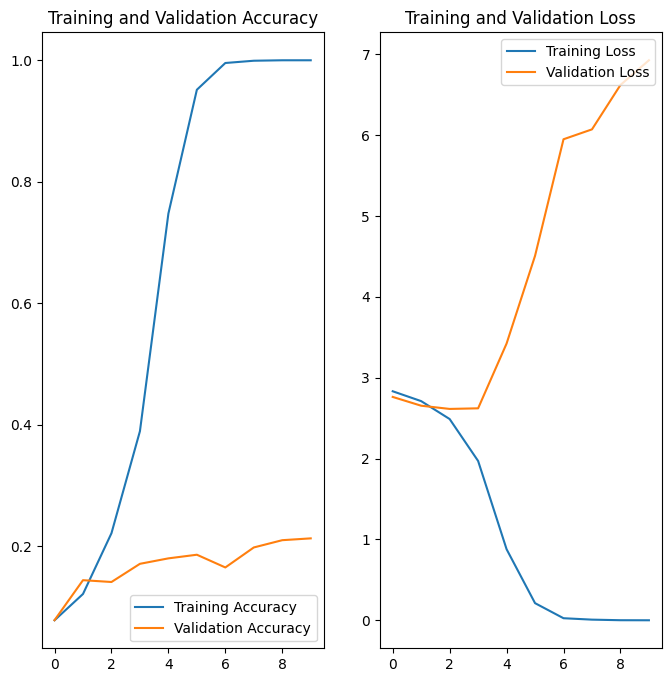

In [16]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [247]:
data_augmentation = keras.Sequential(
  [
    layers.RandomFlip("horizontal",
                      input_shape=(img_height,
                                  img_width,
                                  3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
  ]
)

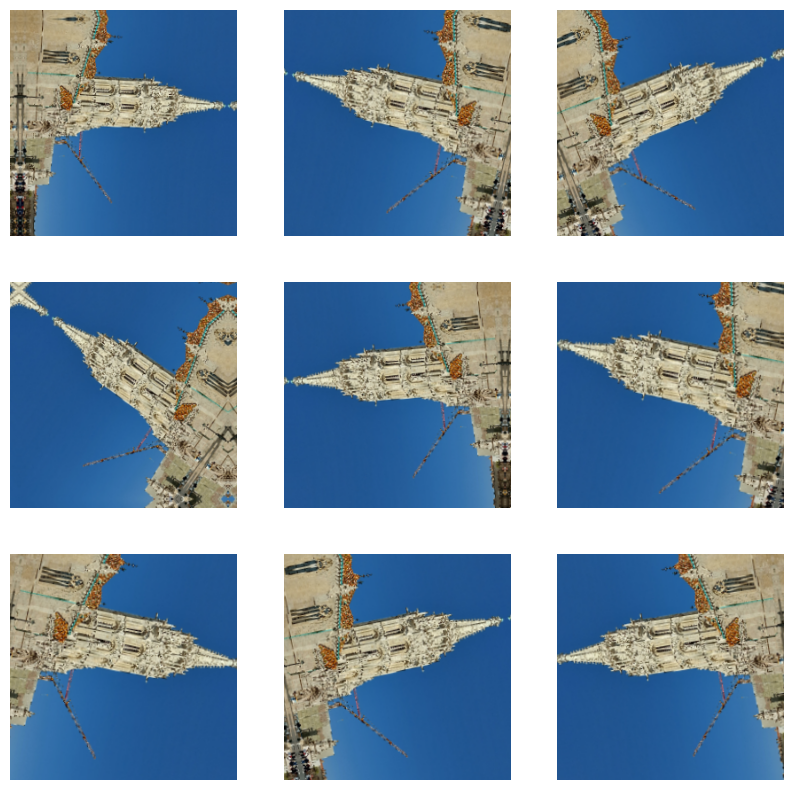

In [248]:
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
  for i in range(9):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    plt.axis("off")

In [249]:
model = Sequential([
  data_augmentation,
  layers.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes, name="outputs")
])

In [250]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [251]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_1 (Sequential)   (None, 256, 256, 3)       0         
                                                                 
 rescaling_19 (Rescaling)    (None, 256, 256, 3)       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 256, 256, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 128, 128, 16)     0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 128, 128, 32)      4640      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 64, 64, 32)       0         
 2D)                                                  

In [252]:
epochs = 15
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/15
77/77 [==============================] - 10s 80ms/step - loss: 2.9400 - accuracy: 0.1226 - val_loss: 2.4919 - val_accuracy: 0.1885
Epoch 2/15
77/77 [==============================] - 6s 75ms/step - loss: 2.5845 - accuracy: 0.1747 - val_loss: 2.4542 - val_accuracy: 0.2251
Epoch 3/15
77/77 [==============================] - 6s 76ms/step - loss: 2.5082 - accuracy: 0.2008 - val_loss: 2.4183 - val_accuracy: 0.2356
Epoch 4/15
77/77 [==============================] - 6s 77ms/step - loss: 2.4263 - accuracy: 0.2386 - val_loss: 2.4409 - val_accuracy: 0.2042
Epoch 5/15
77/77 [==============================] - 6s 75ms/step - loss: 2.2967 - accuracy: 0.2790 - val_loss: 2.2039 - val_accuracy: 0.3246
Epoch 6/15
77/77 [==============================] - 6s 75ms/step - loss: 2.1601 - accuracy: 0.3259 - val_loss: 2.3203 - val_accuracy: 0.2513
Epoch 7/15
77/77 [==============================] - 6s 79ms/step - loss: 2.0909 - accuracy: 0.3481 - val_loss: 2.2718 - val_accuracy: 0.2670
Epoch 8/15
7

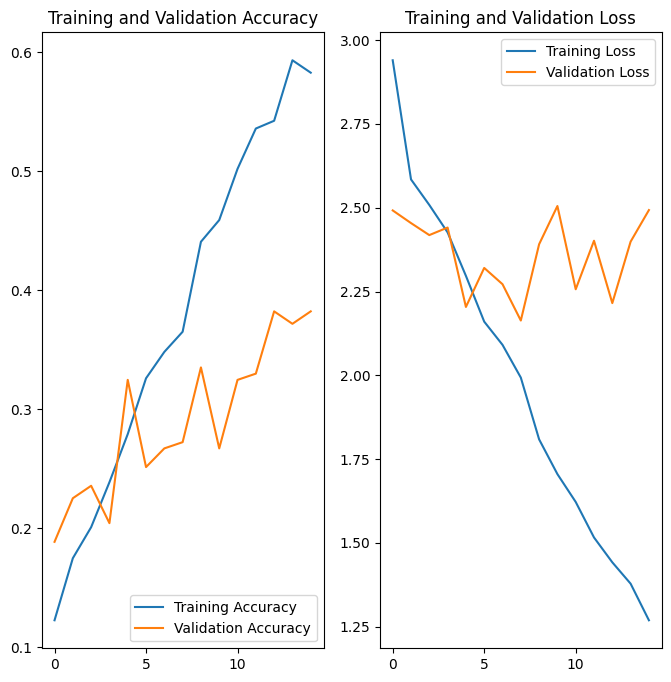

In [253]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [193]:
budacastle = "C://Users//HP//Downloads//1.jpg"

img = tf.keras.utils.load_img(
    budacastle, target_size=(256, 256)
)
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence. {}"
    .format(names[np.argmax(score)], 100 * np.max(score), score)
)

1/1 [==============================] - 0s 28ms/step
This image most likely belongs to Esztergom_Cathedral with a 99.94 percent confidence. [1.8432166e-07 4.6894655e-07 5.4478832e-08 9.9944204e-01 4.7606669e-04
 3.4566694e-06 9.0936755e-06 1.5198216e-08 1.3523731e-05 3.8686525e-07
 4.6455058e-05 9.1719933e-08 4.3622549e-07 1.1881491e-07 2.0427215e-07
 7.5283679e-06]


In [194]:
model.save("landmark_model4.h5")

In [ ]:
displayer = _metadata.MetadataDisplayer.with_model_file(export_model_path)
export_json_file = os.path.join(FLAGS.export_directory,
                                os.path.splitext(model_basename)[0] + ".json")
json_file = displayer.get_metadata_json()
# Optional: write out the metadata as a json file
with open(export_json_file, "w") as f:
  f.write(json_file)

In [195]:
# Convert the model.
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Save the model.
with open('model4.tflite', 'wb') as f:
  f.write(tflite_model)

INFO:tensorflow:Assets written to: C:\Users\HP\AppData\Local\Temp\tmplkzdjty7\assets


INFO:tensorflow:Assets written to: C:\Users\HP\AppData\Local\Temp\tmplkzdjty7\assets


In [160]:
from struct import unpack
from tqdm import tqdm
import os
    
dir = "imagesNewTest/Matthias_Church_(Budapest)"
    
marker_mapping = {
    0xffd8: "Start of Image",
    0xffe0: "Application Default Header",
    0xffdb: "Quantization Table",
    0xffc0: "Start of Frame",
    0xffc4: "Define Huffman Table",
    0xffda: "Start of Scan",
    0xffd9: "End of Image"
}
    
class JPEG:
    def __init__(self, image_file):
        with open(image_file, 'rb') as f:
            self.img_data = f.read()
    
    def decode(self):
        data = self.img_data
        while(True):
            marker, = unpack(">H", data[0:2])
            # print(marker_mapping.get(marker))
            if marker == 0xffd8:
                data = data[2:]
            elif marker == 0xffd9:
                return
            elif marker == 0xffda:
                data = data[-2:]
            else:
                lenchunk, = unpack(">H", data[2:4])
                data = data[2+lenchunk:]            
            if len(data)==0:
                raise TypeError("issue reading jpeg file")       
    
bads = []

for dirName, subdirList, fileList in os.walk(dir):
    imagesList = fileList
    for img in tqdm(imagesList):
        image = os.path.join(dir,img)
        image = JPEG(image) 
        try:
            image.decode()   
        except:
            bads.append(img)

for name in bads:
    os.remove(os.path.join(dir,name))

100%|██████████| 130/130 [00:02<00:00, 59.17it/s]


In [162]:
from pathlib import Path
import imghdr

data_dir = "imagesNewTest/Matthias_Church_(Budapest)/"
image_extensions = [".png", ".jpeg", ".jpg"]  # add there all your images file extensions

class_names = names
print(class_names)

img_type_accepted_by_tf = ["bmp", "gif", "jpeg", "png"]
for filepath in Path(data_dir).rglob("*"):
    if filepath.suffix.lower() in image_extensions:
        img_type = imghdr.what(filepath)
        if img_type is None:
            print(f"{filepath} is not an image")
        elif img_type not in img_type_accepted_by_tf:
            print(f"{filepath} is a {img_type}, not accepted by TensorFlow")

['Matthias_Church_(Budapest)', 'New_York_Palace_(Budapest)']
